In [1]:
import pandas as pd
from scipy.stats.mstats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

DMRsigfile='/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/CD4/mincpg1_feature_significance_Allfile_DMRwise_avg.txt'  #"/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/mNeu/BL14_atleast.2_top-1_singleCpG_final_assignedref_uniq.txt_result_final.txt_folder_mincpg1_feature_significance_Allfile_DMRwise_avg.txt"

metCWfile="/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/CD4/BL14_all_matrixCin_nr0.4_imputed_g1_CD4_3_g2_others_33.txt" #"/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/mNeu/BL14_all_matrixCin_nr0.4_imputed_g1_mNeu_3_g2_others_33_CW.7.txt"#"/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/CD4/BL14_all_matrixCin_nr0.4_imputed_g1_CD4_3_g2_others_33.txt"


DMRsigdf=pd.read_csv(DMRsigfile,sep="\t")

DMRsigdf.rename(columns={'DMRchr':'chrom','DMRstart':'start','DMRend':'end'},inplace=True)
DMRsigdf.head()


,chrom,start,end,#TP_fragment,#FP_fragment,#TN_fragment,#FN_fragment,#Total_Fragment,TPR,FPR,FDR
0,chr1,32387133,32387499,0.822727,2.109091,123.093939,1.772727,127.798485,0.624073,0.013452,0.851987
1,chr10,5754070,5754515,1.392308,5.670513,131.166667,1.261538,139.491026,0.344499,0.042307,0.885537
2,chr11,64490608,64490797,4.360000,51.411667,282.495000,3.370000,341.636667,0.427657,0.153829,0.937214
3,chr12,3905651,3906251,3.587500,30.597917,182.606250,1.950000,218.741667,0.568029,0.125205,0.882720
4,chr14,77029428,77029733,2.050000,23.165152,201.709091,1.345455,228.269697,0.399051,0.108957,0.935254


In [2]:
metCWdf=pd.read_csv(metCWfile,sep="\t")
metCWdf.head()

,chrom,start,end,q,diff,#cpg,p(MWU),p(2dks),CD4,others,...,CD4-m8,CD4-DC,CD4-Eo,CD4-Tr,CD4-m4,CD4-Mg,CD4-Er,CD4-mB,maxCompartmentwisedelta,minCompartmentwiseDelta
0,chr1,32387133,32387499,1.785900e-12,-0.584534,11,4.363200e-14,9.452200e-17,0.35261,0.93714,...,-0.590663,-0.627905,-0.584754,-0.501935,-0.452617,-0.601208,-0.608663,-0.614178,-0.452617,-0.635087
1,chr10,5754070,5754515,1.133300e-13,-0.583604,13,4.496400e-14,4.844000e-18,0.30687,0.89048,...,-0.434899,-0.660617,-0.611245,-0.352938,-0.337668,-0.662784,-0.663015,-0.661489,-0.337668,-0.675412
2,chr11,64490608,64490797,3.732800e-10,-0.555806,10,4.196600e-14,3.598000e-14,0.19153,0.74734,...,-0.354470,-0.628070,-0.602220,-0.519620,-0.316970,-0.726920,-0.669520,-0.539303,-0.316970,-0.726920
3,chr12,3905651,3906251,2.642700e-10,-0.658527,8,5.173600e-14,2.418200e-14,0.17879,0.83732,...,-0.552210,-0.770793,-0.317085,-0.674397,-0.467648,-0.630022,-0.632148,-0.704043,-0.317085,-0.790710
4,chr14,77029428,77029733,1.273400e-14,-0.587526,11,4.607400e-14,4.440900e-19,0.18803,0.77556,...,-0.630197,-0.707849,-0.569470,-0.372152,-0.406061,-0.703652,-0.691561,-0.399818,-0.366546,-0.744940


In [3]:
combined=DMRsigdf.merge(metCWdf,on=['chrom','start','end'])
combined.head()

,chrom,start,end,#TP_fragment,#FP_fragment,#TN_fragment,#FN_fragment,#Total_Fragment,TPR,FPR,...,CD4-m8,CD4-DC,CD4-Eo,CD4-Tr,CD4-m4,CD4-Mg,CD4-Er,CD4-mB,maxCompartmentwisedelta,minCompartmentwiseDelta
0,chr1,32387133,32387499,0.822727,2.109091,123.093939,1.772727,127.798485,0.624073,0.013452,...,-0.590663,-0.627905,-0.584754,-0.501935,-0.452617,-0.601208,-0.608663,-0.614178,-0.452617,-0.635087
1,chr10,5754070,5754515,1.392308,5.670513,131.166667,1.261538,139.491026,0.344499,0.042307,...,-0.434899,-0.660617,-0.611245,-0.352938,-0.337668,-0.662784,-0.663015,-0.661489,-0.337668,-0.675412
2,chr11,64490608,64490797,4.360000,51.411667,282.495000,3.370000,341.636667,0.427657,0.153829,...,-0.354470,-0.628070,-0.602220,-0.519620,-0.316970,-0.726920,-0.669520,-0.539303,-0.316970,-0.726920
3,chr12,3905651,3906251,3.587500,30.597917,182.606250,1.950000,218.741667,0.568029,0.125205,...,-0.552210,-0.770793,-0.317085,-0.674397,-0.467648,-0.630022,-0.632148,-0.704043,-0.317085,-0.790710
4,chr14,77029428,77029733,2.050000,23.165152,201.709091,1.345455,228.269697,0.399051,0.108957,...,-0.630197,-0.707849,-0.569470,-0.372152,-0.406061,-0.703652,-0.691561,-0.399818,-0.366546,-0.744940


In [4]:
combined.shape

(21, 48)

In [5]:
combined['DMRlength']=combined['end']-combined['start']
combined['#cpg/DMRlength']=combined['#cpg']/combined['DMRlength']
combined['DMRlength/#Total_Fragment']=combined['DMRlength']/combined['#Total_Fragment']
combined['#Total_Fragment/DMRlength']=combined['#Total_Fragment']/combined['DMRlength']
combined.head()

,chrom,start,end,#TP_fragment,#FP_fragment,#TN_fragment,#FN_fragment,#Total_Fragment,TPR,FPR,...,CD4-m4,CD4-Mg,CD4-Er,CD4-mB,maxCompartmentwisedelta,minCompartmentwiseDelta,DMRlength,#cpg/DMRlength,DMRlength/#Total_Fragment,#Total_Fragment/DMRlength
0,chr1,32387133,32387499,0.822727,2.109091,123.093939,1.772727,127.798485,0.624073,0.013452,...,-0.452617,-0.601208,-0.608663,-0.614178,-0.452617,-0.635087,366,0.030055,2.863884,0.349176
1,chr10,5754070,5754515,1.392308,5.670513,131.166667,1.261538,139.491026,0.344499,0.042307,...,-0.337668,-0.662784,-0.663015,-0.661489,-0.337668,-0.675412,445,0.029213,3.190169,0.313463
2,chr11,64490608,64490797,4.360000,51.411667,282.495000,3.370000,341.636667,0.427657,0.153829,...,-0.316970,-0.726920,-0.669520,-0.539303,-0.316970,-0.726920,189,0.052910,0.553219,1.807601
3,chr12,3905651,3906251,3.587500,30.597917,182.606250,1.950000,218.741667,0.568029,0.125205,...,-0.467648,-0.630022,-0.632148,-0.704043,-0.317085,-0.790710,600,0.013333,2.742962,0.364569
4,chr14,77029428,77029733,2.050000,23.165152,201.709091,1.345455,228.269697,0.399051,0.108957,...,-0.406061,-0.703652,-0.691561,-0.399818,-0.366546,-0.744940,305,0.036066,1.336139,0.748425


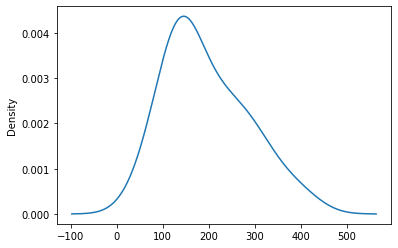

In [6]:
combined['#Total_Fragment'].plot.kde() #hist()

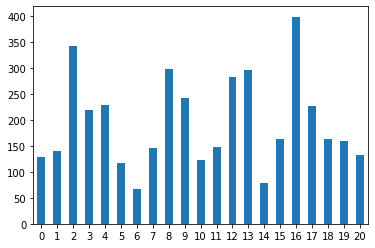

In [7]:
combined['#Total_Fragment'].plot.bar(rot=0)

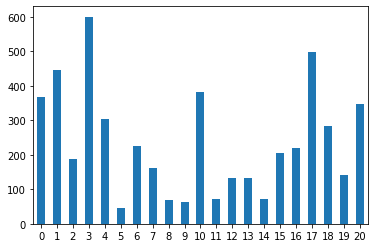

In [8]:
combined['DMRlength'].plot.bar(rot=0)

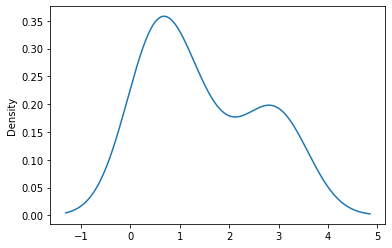

In [9]:
combined['DMRlength/#Total_Fragment'].plot.kde()

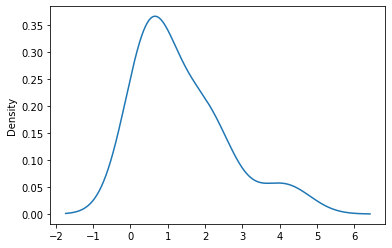

In [10]:
combined['#Total_Fragment/DMRlength'].plot.kde()

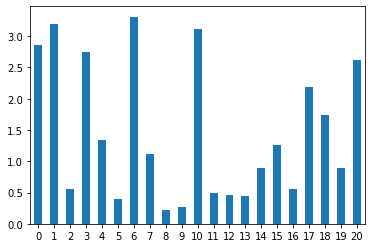

In [11]:
combined['DMRlength/#Total_Fragment'].plot.bar(rot=0)

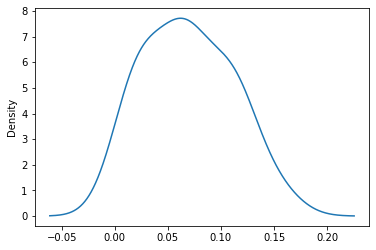

In [12]:
combined['FPR'].plot.kde() #hist()

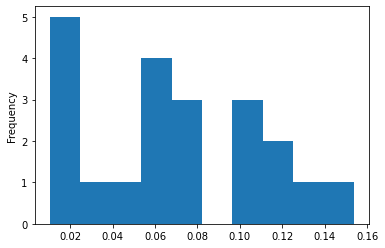

In [13]:
combined['FPR'].plot.hist()

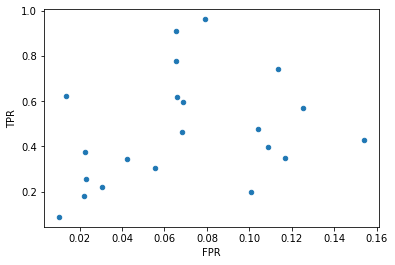

In [14]:
combined.plot.scatter(x='FPR',y='TPR')

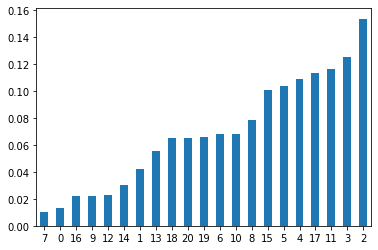

In [15]:
combined['FPR'].sort_values().plot.bar(rot=0)

In [16]:
combined[combined['FPR']==combined['FPR'].sort_values()[0]]

,chrom,start,end,#TP_fragment,#FP_fragment,#TN_fragment,#FN_fragment,#Total_Fragment,TPR,FPR,...,CD4-m4,CD4-Mg,CD4-Er,CD4-mB,maxCompartmentwisedelta,minCompartmentwiseDelta,DMRlength,#cpg/DMRlength,DMRlength/#Total_Fragment,#Total_Fragment/DMRlength
0,chr1,32387133,32387499,0.822727,2.109091,123.093939,1.772727,127.798485,0.624073,0.013452,...,-0.452617,-0.601208,-0.608663,-0.614178,-0.452617,-0.635087,366,0.030055,2.863884,0.349176


In [17]:
combined['FPR'].mean()

0.06929416834925661

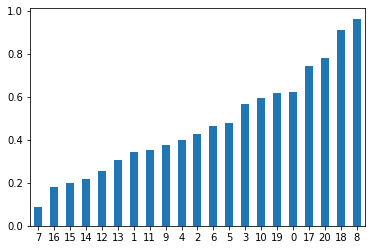

In [18]:
combined['TPR'].sort_values().plot.bar(rot=0)

In [19]:
combined.loc[[18,8,20]]

,chrom,start,end,#TP_fragment,#FP_fragment,#TN_fragment,#FN_fragment,#Total_Fragment,TPR,FPR,...,CD4-m4,CD4-Mg,CD4-Er,CD4-mB,maxCompartmentwisedelta,minCompartmentwiseDelta,DMRlength,#cpg/DMRlength,DMRlength/#Total_Fragment,#Total_Fragment/DMRlength
18,chr6,33630045,33630328,3.500000,10.497619,148.242857,1.121429,163.361905,0.911462,0.065441,...,-0.314810,-0.698953,-0.631881,-0.724834,-0.314810,-0.756739,283,0.024735,1.732350,0.577251
8,chr16,50550239,50550307,6.166667,22.991667,268.027778,0.616667,297.802778,0.962866,0.078934,...,-0.598611,-0.856361,-0.849694,-0.869111,-0.309111,-0.882166,68,0.088235,0.228339,4.379453
20,chr8,66026537,66026883,2.781250,8.406250,119.579167,1.037500,131.804167,0.780225,0.065443,...,-0.458268,-0.687768,-0.655642,-0.715205,-0.447705,-0.715205,346,0.023121,2.625107,0.380937


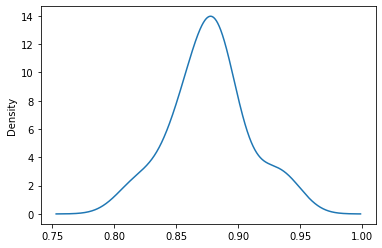

In [20]:
combined['FDR'].plot.kde() #.hist()

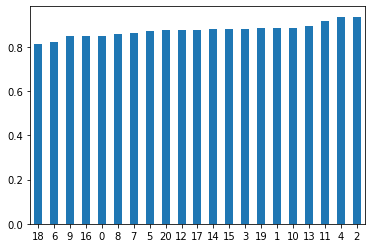

In [21]:
combined['FDR'].sort_values().plot.bar(rot=0)

In [22]:
combined.to_csv(DMRsigfile+"_stats.txt",sep="\t",index=False)

In [23]:
corrdf=combined.corr()
corrdf['FPR'].sort_values()

others                      -0.928313
CD4                         -0.764774
CD4.1                       -0.764769
m4                          -0.728097
minCompartmentwiseDelta     -0.703520
m8                          -0.698794
NK                          -0.689519
CD4-Mg                      -0.680957
nB                          -0.658551
CD8                         -0.655956
CD4-Mn                      -0.634229
Eo                          -0.627099
CD4-Er                      -0.595228
Tr                          -0.586093
CD4-DC                      -0.572671
mB                          -0.558600
CD4-mNeu                    -0.555408
Er                          -0.554618
DC                          -0.543353
CD4-nB                      -0.537801
diff                        -0.513052
mNeu                        -0.511059
Mn                          -0.437148
CD4-NK                      -0.403401
CD4-Tr                      -0.391564
Mg                          -0.372029
#FN_fragment

In [24]:
corrdf['TPR'].sort_values()

CD4-nB                      -0.710605
diff                        -0.692461
CD4-mB                      -0.680107
CD4-mNeu                    -0.667419
minCompartmentwiseDelta     -0.658101
CD4-DC                      -0.653272
CD4-Mg                      -0.649204
CD4.1                       -0.637458
CD4                         -0.637455
#FN_fragment                -0.633126
CD4-Mn                      -0.619710
CD4-Er                      -0.600416
CD4-NK                      -0.568771
CD4-m8                      -0.563743
CD4-Eo                      -0.560825
CD4-Tr                      -0.524589
CD8                         -0.516212
m4                          -0.473060
q                           -0.447967
p(2dks)                     -0.435183
CD4-m4                      -0.348128
p(MWU)                      -0.319631
others                      -0.274971
FDR                         -0.274738
Tr                          -0.265149
Er                          -0.208880
NK          

In [25]:
corrdf['FDR'].sort_values()

nB                          -0.724036
others                      -0.627011
DC                          -0.604463
m8                          -0.548447
mNeu                        -0.516632
mB                          -0.506958
Mn                          -0.473255
NK                          -0.443057
Eo                          -0.422166
Tr                          -0.388970
CD8                         -0.368816
TPR                         -0.274738
DMRlength/#Total_Fragment   -0.232357
m4                          -0.197498
p(2dks)                     -0.164780
CD4-Mg                      -0.161092
q                           -0.160452
CD4-Er                      -0.128972
CD4                         -0.104197
CD4.1                       -0.104190
p(MWU)                      -0.057611
minCompartmentwiseDelta     -0.017040
#TP_fragment                -0.008850
DMRlength                    0.001379
#Total_Fragment/DMRlength    0.009548
Er                           0.040773
CD4-Mn      

In [26]:
corrdf['#Total_Fragment'].sort_values()

DMRlength/#Total_Fragment   -0.527598
end                         -0.330848
start                       -0.330848
m8                          -0.262110
nB                          -0.258788
q                           -0.182833
NK                          -0.177133
CD8                         -0.167496
p(2dks)                     -0.158636
others                      -0.108759
DC                          -0.087858
DMRlength                   -0.084700
TPR                         -0.080078
mB                          -0.072003
CD4-Mg                      -0.029639
p(MWU)                      -0.019338
CD4-Tr                      -0.019150
Er                          -0.013823
#cpg/DMRlength              -0.000066
m4                           0.010430
Eo                           0.020620
CD4-Eo                       0.021756
CD4-mNeu                     0.022306
CD4-Mn                       0.026200
CD4                          0.042222
CD4.1                        0.042229
mNeu        

In [27]:
# sns.scatterplot(combined['FDR'], combined['FPR'])
corrdf_pearson=combined.corr(method='pearson')
corrdf_spearman=combined.corr(method='spearman')
def plt_corr(x, y):
    fig = plt.figure()
    lm = sns.lmplot(x=x, y=y, data=combined)
    ax = lm.axes[0, 0]
    p_corr = np.around(corrdf_pearson[x][y], decimals=3)
    s_corr = np.around(corrdf_spearman[x][y], decimals=3)
    p_val_pearson = np.around(pearsonr(combined[x], combined[y])[1], decimals=8)
    p_val_spearman = np.around(spearmanr(combined[x], combined[y])[1], decimals=8)
    txt = 'r = ' + str(p_corr) + ', p-val = ' + str(p_val_pearson) + '\nrho = ' + str(s_corr) + ', p-val = ' + str(p_val_spearman)
    ax.text(np.array(combined[x].sort_values())[0], np.array(combined[y].sort_values())[-2], txt, horizontalalignment='left', verticalalignment='bottom')
    return lm

<Figure size 432x288 with 0 Axes>

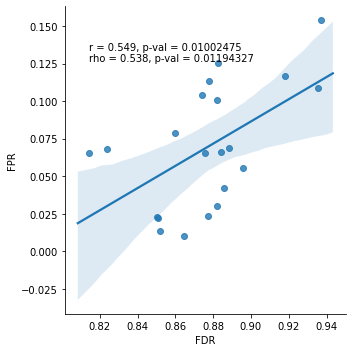

In [28]:
x1 = 'FDR'
y1 = 'FPR'
fig1 = plt_corr(x1, y1)
fig1.savefig(DMRsigfile+x1+y1+".pdf",dpi=300)

<Figure size 432x288 with 0 Axes>

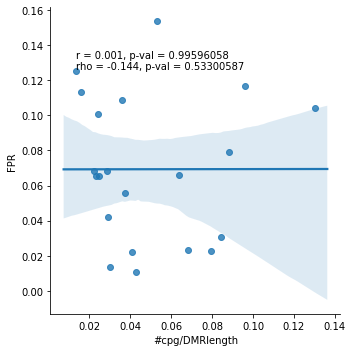

In [29]:
x1 = '#cpg/DMRlength'
y1 = 'FPR'
fig2 = plt_corr(x1, y1)
fig2.savefig(DMRsigfile+"#cpgdivbyDMRlength"+y1+".pdf",dpi=300)

<Figure size 432x288 with 0 Axes>

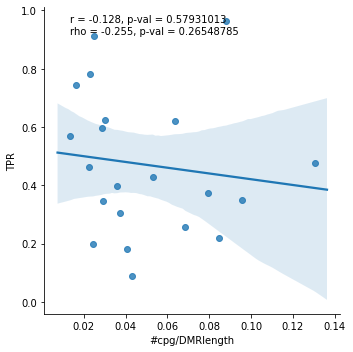

In [30]:
x1 = '#cpg/DMRlength'
y1 = 'TPR'
fig2 = plt_corr(x1, y1)
fig2.savefig(DMRsigfile+"#cpgdivbyDMRlength"+y1+".pdf",dpi=300)

<Figure size 432x288 with 0 Axes>

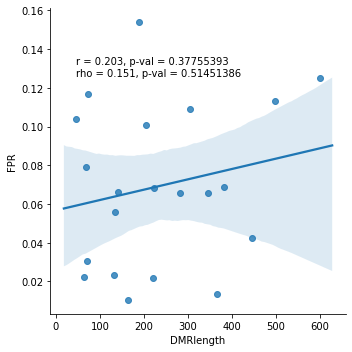

In [31]:
x1 = 'DMRlength'
y1 = 'FPR'
fig3 = plt_corr(x1, y1)
fig3.savefig(DMRsigfile+x1+y1+".pdf",dpi=300)

<Figure size 432x288 with 0 Axes>

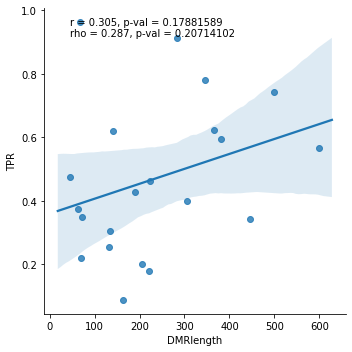

In [32]:
x1 = 'DMRlength'
y1 = 'TPR'
fig3 = plt_corr(x1, y1)
fig3.savefig(DMRsigfile+x1+y1+".pdf",dpi=300)

<Figure size 432x288 with 0 Axes>

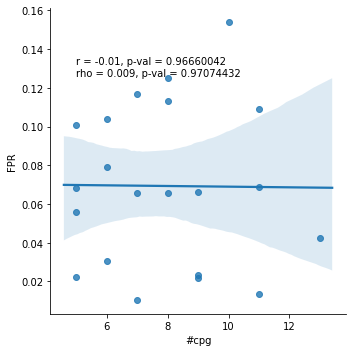

In [33]:
x1 = '#cpg'
y1 = 'FPR'
fig3 = plt_corr(x1, y1)
fig3.savefig(DMRsigfile+x1+y1+".pdf",dpi=300)

<Figure size 432x288 with 0 Axes>

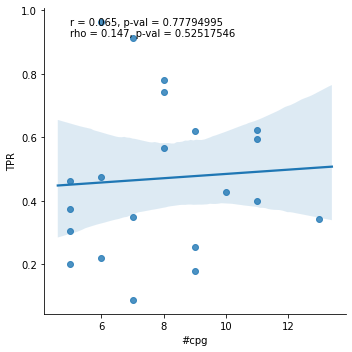

In [34]:
x1 = '#cpg'
y1 = 'TPR'
fig3 = plt_corr(x1, y1)
fig3.savefig(DMRsigfile+x1+y1+".pdf",dpi=300)

<Figure size 432x288 with 0 Axes>

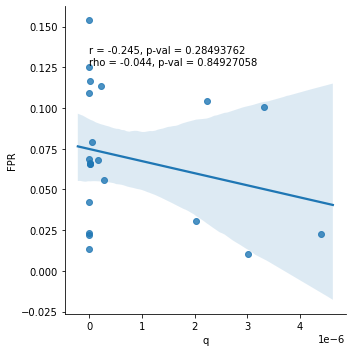

In [35]:
x1 = 'q'
y1 = 'FPR'
fig3 = plt_corr(x1, y1)
fig3.savefig(DMRsigfile+x1+y1+".pdf",dpi=300)

<Figure size 432x288 with 0 Axes>

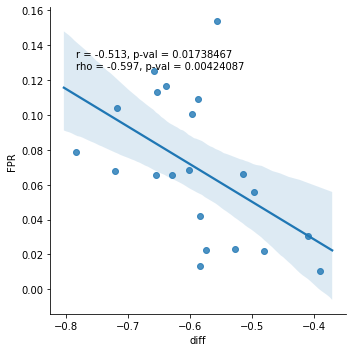

In [36]:
x1 = 'diff'
y1 = 'FPR'
fig3 = plt_corr(x1, y1)
fig3.savefig(DMRsigfile+x1+y1+".pdf",dpi=300)

<Figure size 432x288 with 0 Axes>

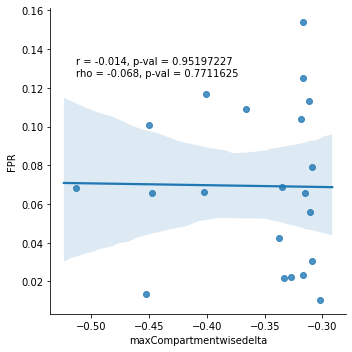

In [37]:
x1 = 'maxCompartmentwisedelta'
y1 = 'FPR'
fig3 = plt_corr(x1, y1)
fig3.savefig(DMRsigfile+x1+y1+".pdf",dpi=300)

<Figure size 432x288 with 0 Axes>

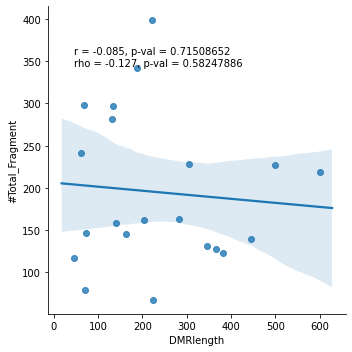

In [38]:
x1 = 'DMRlength'
y1 = '#Total_Fragment'
fig3 = plt_corr(x1, y1)
fig3.savefig(DMRsigfile+x1+y1+".pdf",dpi=300)

<Figure size 432x288 with 0 Axes>

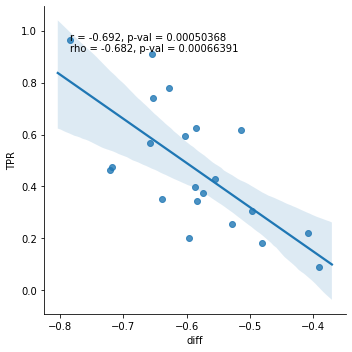

In [39]:
x1 = 'diff'
y1 = 'TPR'
fig3 = plt_corr(x1, y1)
fig3.savefig(DMRsigfile+x1+y1+".pdf",dpi=300)